In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('E:\work\DataSets\\apps.csv')

<h3>Take a look at the data</h3>

In [4]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Drop duplicates
apps =df.drop_duplicates() 

In [6]:
# Print the total number of apps
print('Total number of apps in the dataset = ', apps.App.count())

Total number of apps in the dataset =  9659


In [8]:
# Print a concise summary of apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


In [9]:
# Have a look at a random sample of n rows
n = 5
apps.sample(n)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4817,5802,The Vikings,GAME,4.4,15806,42.0,"1,000,000+",Free,0,Teen,Arcade,"June 6, 2018",1.0.7,4.1 and up
6879,7941,CV Engineer - Free Resume Maker & CV Templates,BUSINESS,4.6,213,3.8,"10,000+",Free,0,Everyone,Business,"April 11, 2018",3.5.3,5.0 and up
3554,4458,Theme Android P Design for LG V30,PERSONALIZATION,4.2,35,5.2,500+,Paid,$1.49,Everyone,Personalization,"April 26, 2018",1.33,7.0 and up
4043,4988,Easy Hotspot Ad Free,TOOLS,5.0,2,3.3,10+,Paid,$0.99,Everyone,Tools,"July 26, 2018",1.05,4.0 and up
3289,4155,G-Switch 3,GAME,4.6,3656,39.0,"100,000+",Free,0,Everyone,Action,"March 15, 2018",1.1.3,3.0 and up


<h3>Missing Values</h3>

In [8]:
!pip install missingno

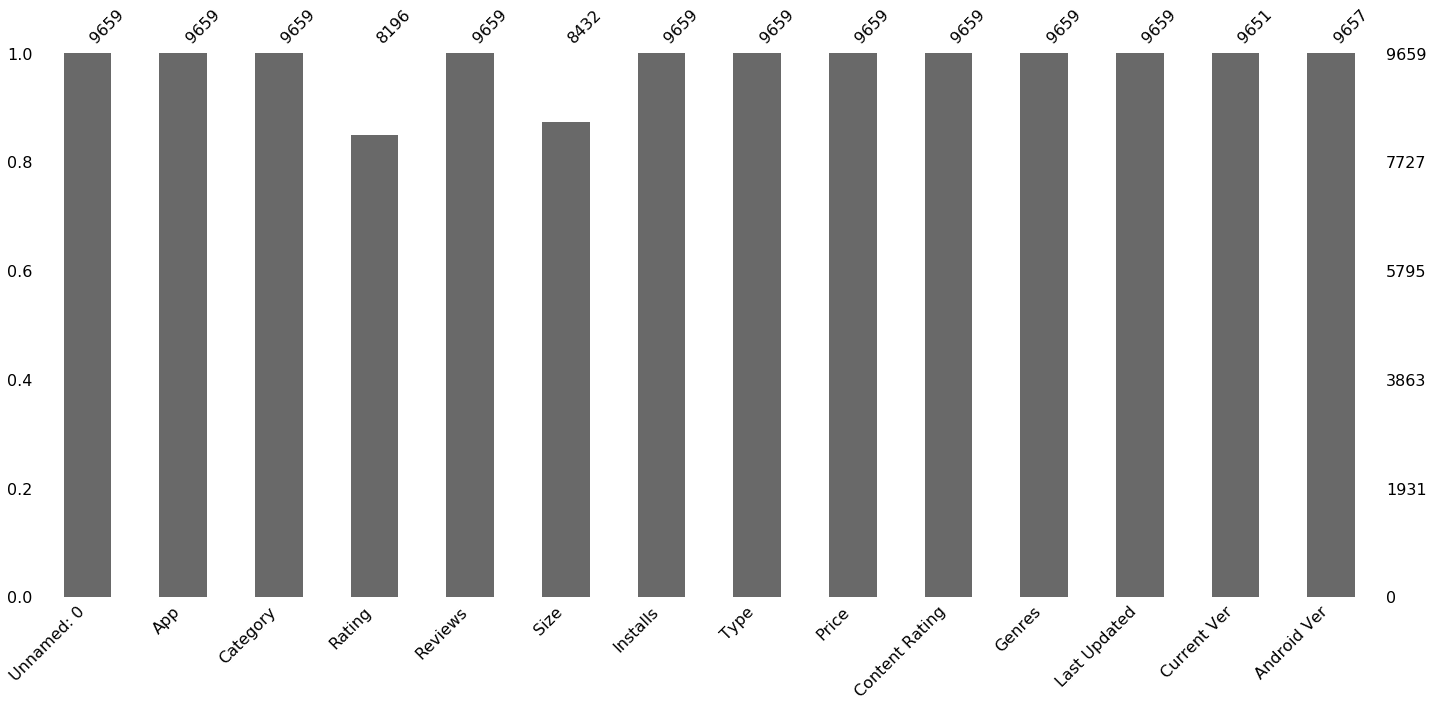

In [10]:
import missingno as msno
msno.bar(apps)

<function matplotlib.pyplot.show(*args, **kw)>

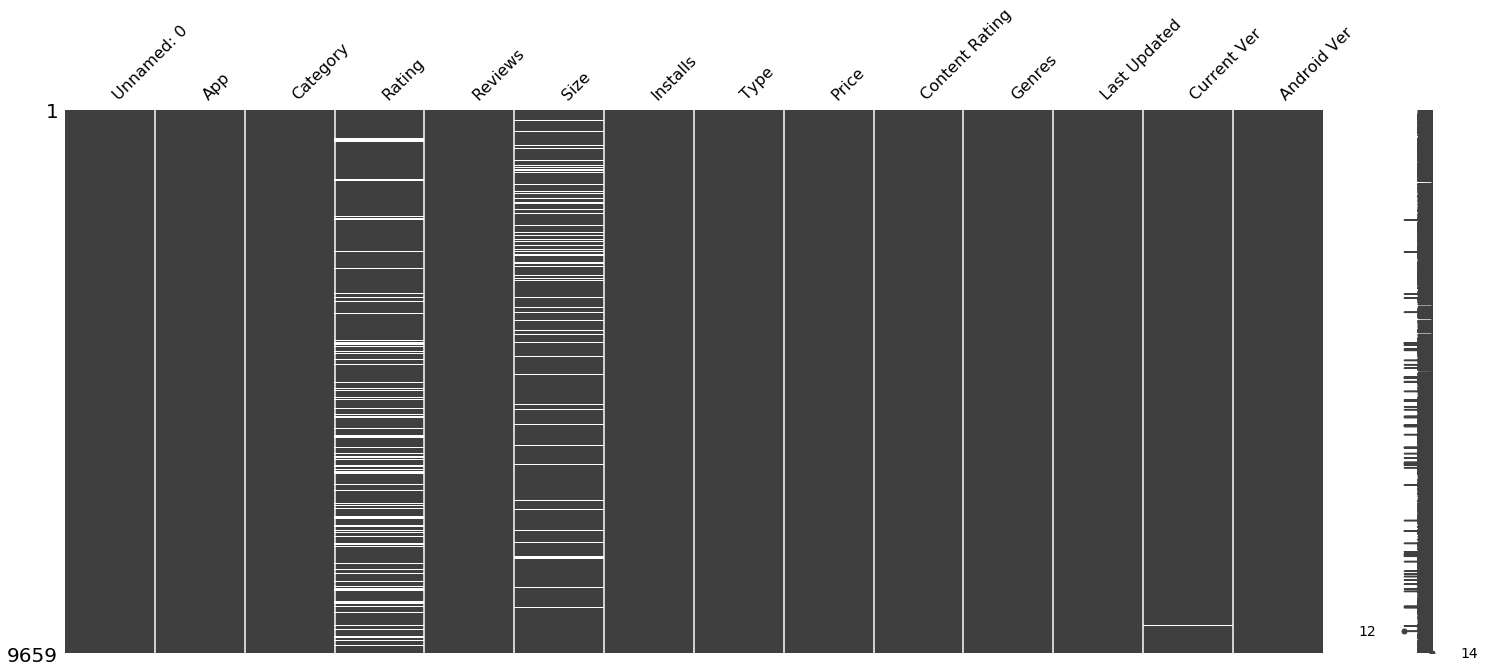

In [11]:
msno.matrix(apps)
plt.show

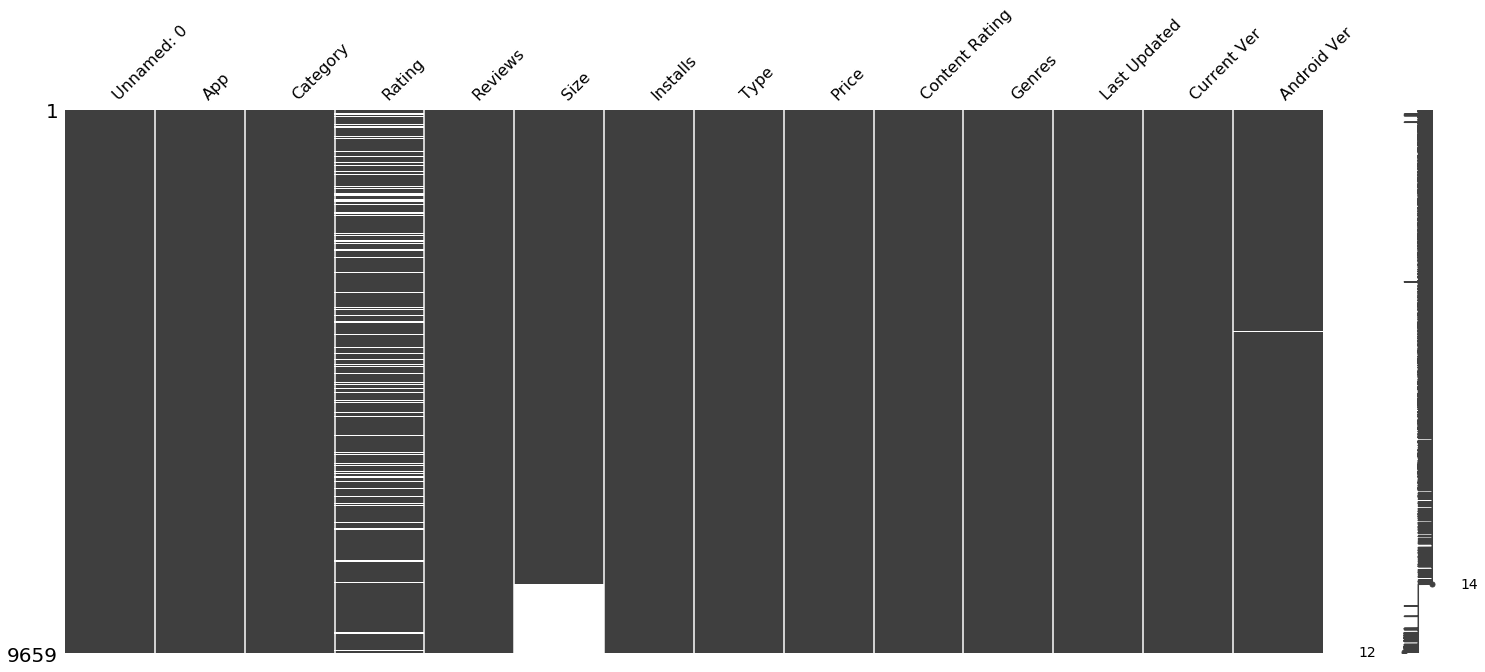

In [12]:
sort=apps.sort_values('Size')
msno.matrix(sort)

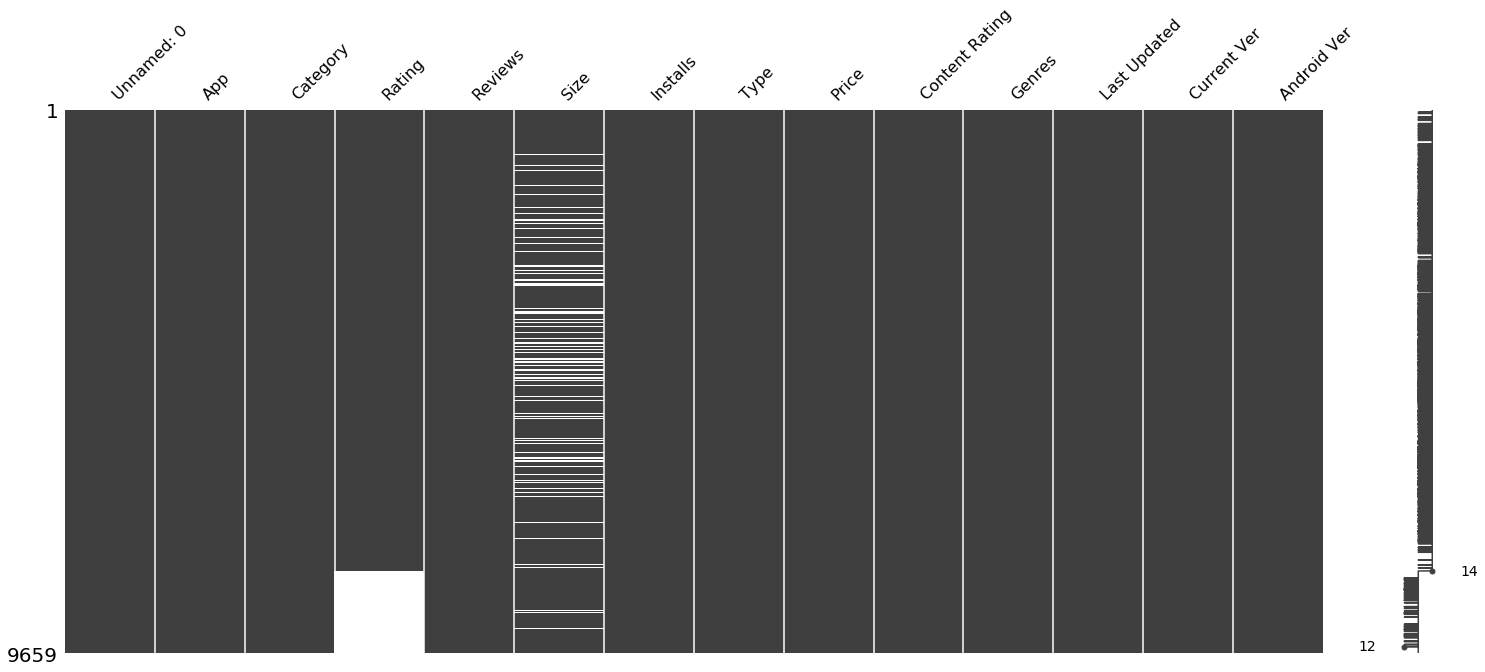

In [13]:
sort=apps.sort_values('Rating')
msno.matrix(sort)

As you seen, missing values  in 'current ver' column is completely random but in another columns are not completely random

<h3>Correlation between Missing Values</h3>

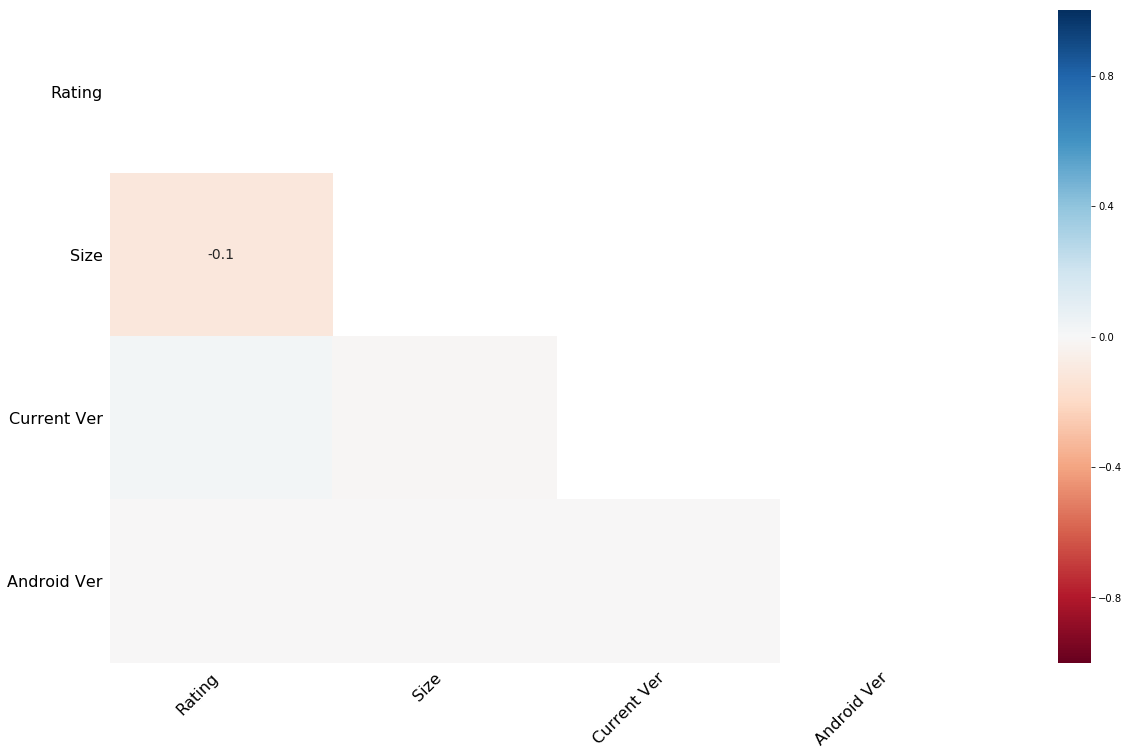

In [14]:
msno.heatmap(apps)


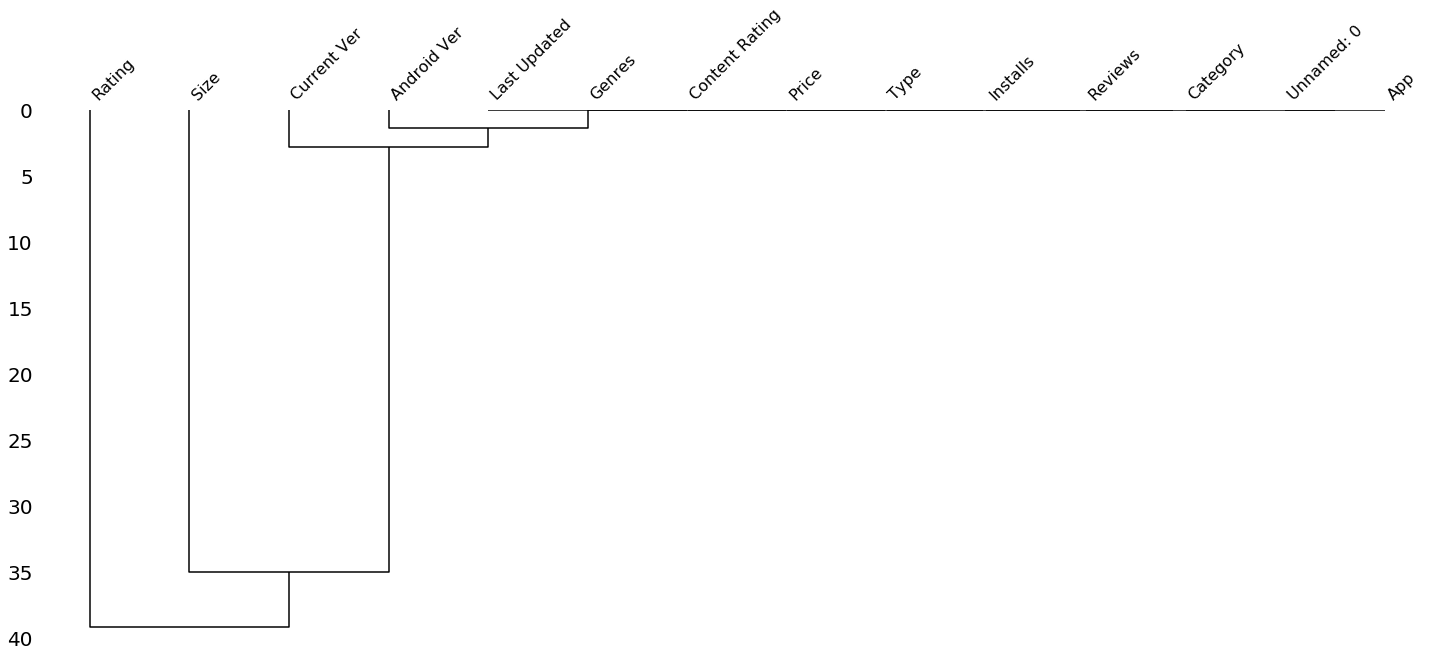

In [15]:
msno.dendrogram(apps)

<h3>Dealing with Missing Values</h3>

<h4>Deletion Pairwise</h4>

In [5]:
apps.dropna(subset=['Android Ver'],how='any',inplace=True)


In [6]:
apps.dropna(subset=['Current Ver'],how='any',inplace=True)

<h4>Imputation</h4>

In [7]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='median')
apps[['Size']]=impute.fit_transform(apps[['Size']])

In [8]:
apps[['Rating']]=impute.fit_transform(apps[['Rating']])

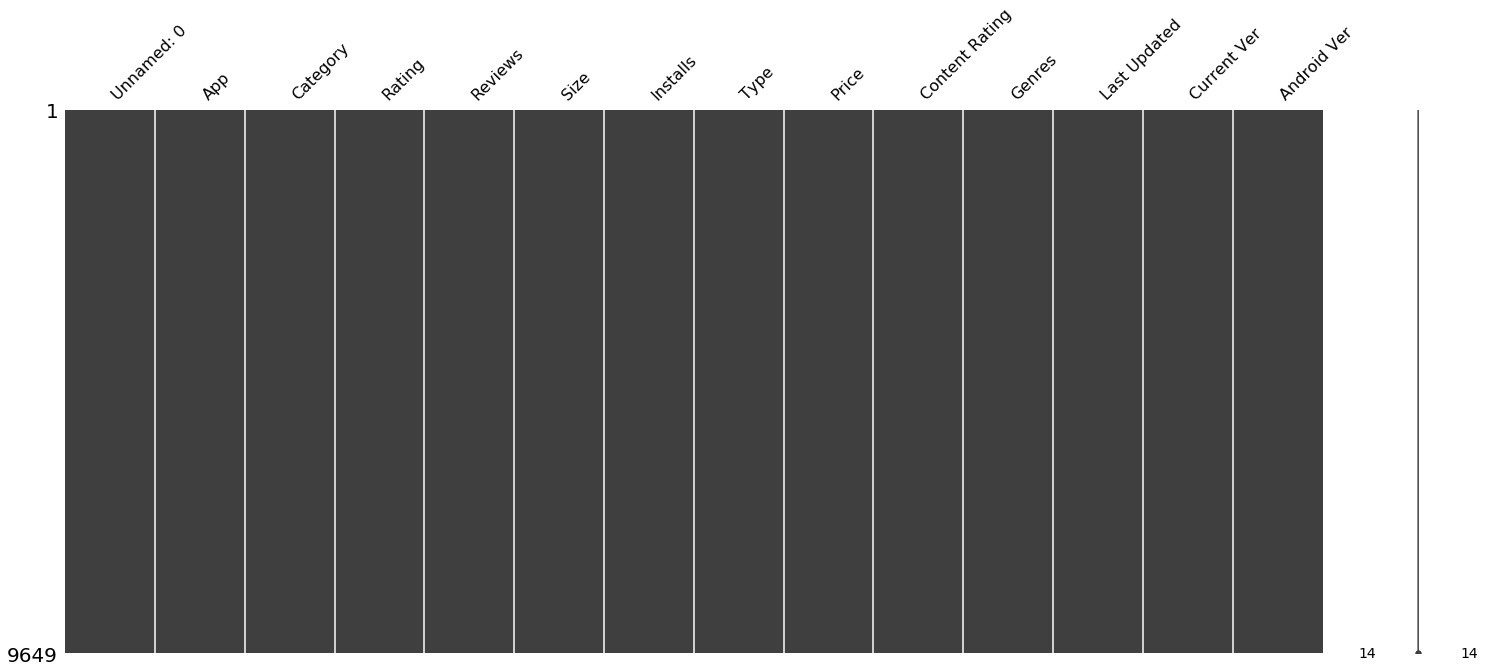

In [20]:
msno.matrix(apps)

As we seen, there is without any Miss values

<h3>Data cleaning</h3>

As you seen,'Android ver' and 'current ver' columns  are similar to each other and having missing values close to zero, but 'Rating'and 'Size' columns related to each other 

Installs and Price columns are of type object and not int64 or float64 as we would expect. This is because the column contains some characters more than just [0,9] digits. Ideally, we would want these columns to be numeric as their name suggests.
Hence, we now proceed to data cleaning and prepare our data to be consumed in our analyis later. Specifically, the presence of special characters (, $ +) in the Installs and Price columns make their conversion to a numerical data type difficult.

In [9]:
# List of column names to clean
col_update=['Installs','Price']
# List of characters to remove
char_remove=['+',',','$']
# Loop for each column
for i in col_update:
    # Replace each character with an empty string
    for j in char_remove:
        apps[i]=apps[i].str.replace(j,'')
    # Convert to numeric
    apps[i]=pd.to_numeric(apps[i])


<h3>Exploring app categories</h3>

In [23]:
# Print the total number of unique categories
print('total number of unique categories: ',apps['Category'].value_counts().count())


total number of unique categories:  33


In [24]:
# Count the number of apps in each 'Category' and sort them in descending order and plot it
apps['Category'].value_counts().sort_values(ascending=False)

FAMILY                 1829
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

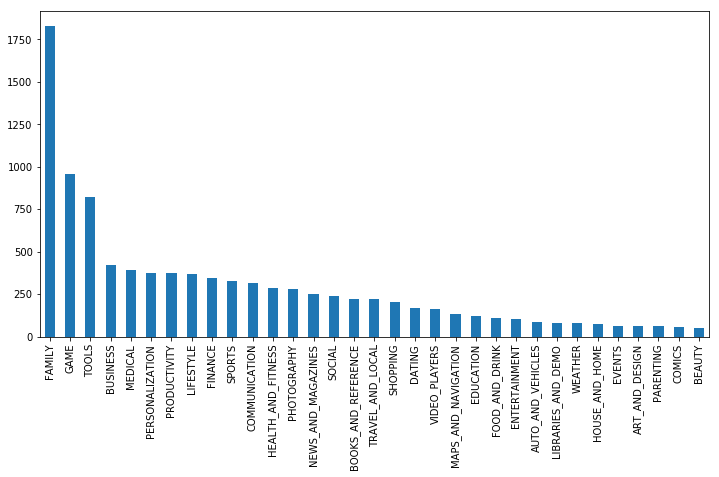

In [25]:
bar_plot=apps['Category'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,6))
bar_plot.plot(kind='bar')

<h3>Distribution of app ratings</h3>

([<matplotlib.axis.XTick at 0x28b4d3d7d68>,
 <a list of 5 Text xticklabel objects>)

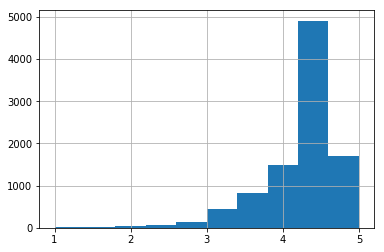

In [26]:
apps.Rating.hist(bins=10)
plt.xticks([1,2,3,4,5])

<h3>Size and price of an app</h3>

<p>Does the size of an app affect its rating?</p>
<p>Do users really care about system-heavy apps or do they prefer light-weighted apps?</p>
<p>Does the price of an app affect its rating?</p>
<p>Do users always prefer free apps over paid apps?</p>

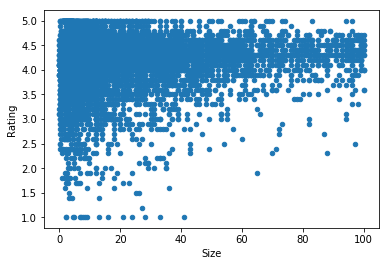

In [28]:
apps.plot(x='Size',y='Rating',kind='scatter')

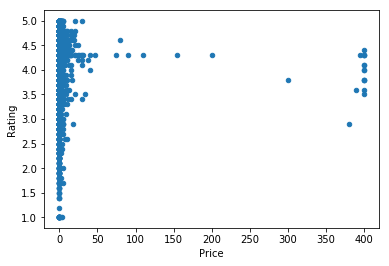

In [29]:
apps.plot(x='Price',y='Rating',kind='scatter')

 <h3>relation between app category and app price</h3>

Text(0, 0.5, 'mean of price for each category')

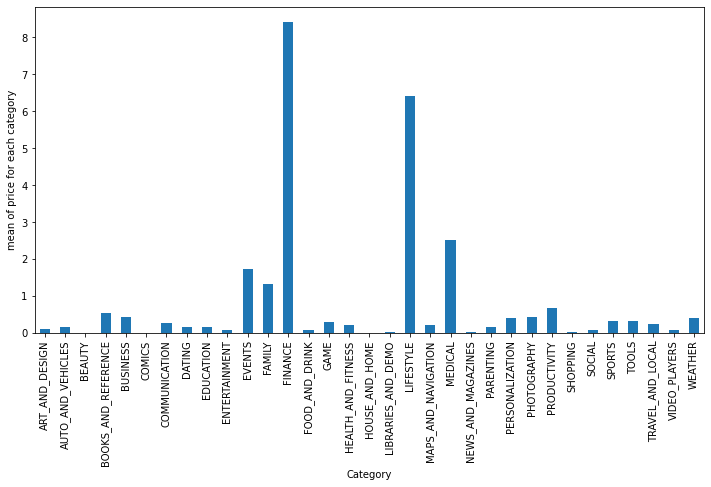

In [21]:
cat_price=apps.groupby('Category')['Price'].mean()
plt.figure(figsize=(12,6))
cat_price.plot(kind='bar')
plt.ylabel('mean of price for each category')

as we seen , average price for 'Finance' and 'Lifestyle' app category are highest.

In [12]:
finance_price=apps['Price'][apps['Category']=='FINANCE']

In [13]:
finance_price

837     0.0
838     0.0
839     0.0
840     0.0
841     0.0
       ... 
9540    0.0
9564    0.0
9565    0.0
9572    0.0
9636    0.0
Name: Price, Length: 345, dtype: float64

Text(0.5, 1.0, 'prices for finance category')

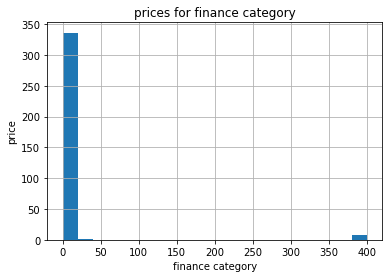

In [45]:
finance_price.hist(bins=20)
plt.xlabel('finance category')
plt.ylabel('price')
plt.title('prices for finance category')

we can see that price of many FINANCE apps are below 50 , but a few number of them have high price 

In [41]:
finance_below100_price=apps.loc[(apps['Category']=='FINANCE')&(apps['Price']<100),['Price','Category']]

In [42]:
finance_below100_price

,Price,Category
837,0.0,FINANCE
838,0.0,FINANCE
839,0.0,FINANCE
840,0.0,FINANCE
841,0.0,FINANCE
...,...,...
9540,0.0,FINANCE
9564,0.0,FINANCE
9565,0.0,FINANCE
9572,0.0,FINANCE


Text(0.5, 1.0, 'price finance category which are below 100')

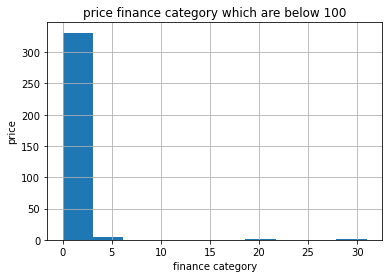

In [44]:
finance_below100_price.hist()
plt.xlabel('finance category')
plt.ylabel('price')
plt.title('price finance category which are below 100')

<h3>Popularity of paid apps vs free apps</h3>

In [48]:
apps.Type.value_counts()

Free    8896
Paid     753
Name: Type, dtype: int64

In [125]:
grouped_type=apps.groupby('Type')['Installs'].median()

Text(0, 0.5, 'number of installs')

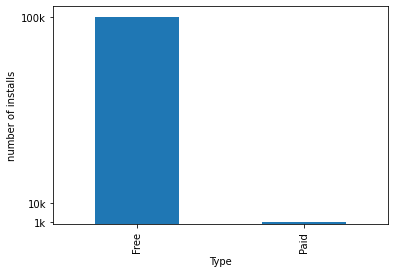

In [127]:
grouped_type.plot(kind='bar')
plt.yticks([1000,10000,100000],['1k','10k','100k'])
plt.ylabel('number of installs')

as seen, median number installed apps for free apps is 100,000 and median number installed apps for paid apps is 1000